In [126]:
import pandas as pd
import datetime
import numpy as np
import json
import os

import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 7)   # Change the size of plots


SOURCE_FILES = [
    'Accounts - Ambre Visa.csv',
    'Accounts - Ambre Personal.csv',
    'Accounts - Manu Mastercard.csv',
    'Accounts - Manu Personal.csv',
    'Accounts - Manu Visa.csv',
    'Accounts - Shared.csv']

LABELS = ['date', 'description', 'withdrawals', 'type', 'sub-type']
LABEL_INDICES = [0,1,2,5,6]
def concat():
    # combine withdrawals from all source files which have a valid type   
    d = pd.DataFrame(columns=LABELS, index=LABELS)
    for source_file in SOURCE_FILES:
        print source_file
        _df = pd.read_csv(os.path.join('../data', source_file), 
                          header=None, 
                          usecols=LABEL_INDICES, 
                          names=LABELS,
                          dtype={'withdrawals': numpy.float32})
        d = pd.concat([d, _df])
    # remove deposits     
    d = d[d['withdrawals'].notnull()]
    
    d = d[(d['sub-type'] != 'Cash Out')]
    d = d[(d['sub-type'] != 'Transfer')]
    d = d[(d['sub-type'] != 'Credit Card Payment')]

    # remove transactions without a valid category     
    d = d[d['type'].notnull()]
    d['type'].replace(to_replace=['Food '], value='Food', inplace=True)
    d['type'].replace(to_replace=['Travel '], value='Travel', inplace=True)    
    d['type'].replace(to_replace=['Utilies'], value='Utilities', inplace=True)
    d['type'].replace(to_replace=['Other'], value='Unknown', inplace=True)
    d['type'].replace(to_replace=['Drink'], value='Drinks', inplace=True)
    d['type'].replace(to_replace=['Clothing'], value='Clothes', inplace=True)
    d['type'].replace(to_replace=['Entertainment'], value='Fun', inplace=True)
    d['type'].replace(to_replace=['Meal'], value='Meals', inplace=True)
    
    # convert str date to date
    d['date'] = pd.to_datetime(d['date'])
    d = d.set_index('date')
    return d
        
d = concat()
d.tail()
list(set(d.type))
# for item in list(d['withdrawals'].values):
#      if not type(item) == float:
#             print item, type(item)

Populating the interactive namespace from numpy and matplotlib
Accounts - Ambre Visa.csv
Accounts - Ambre Personal.csv
Accounts - Manu Mastercard.csv
Accounts - Manu Personal.csv
Accounts - Manu Visa.csv
Accounts - Shared.csv


['Office',
 'Food',
 'Unknown',
 'Medical',
 'Membership',
 'Utilities',
 'Day Care',
 'Personal',
 'Donation',
 'Rent',
 'Fun',
 'Home',
 'Travel',
 'Drinks',
 'Meals',
 'Bank',
 'Clothes']

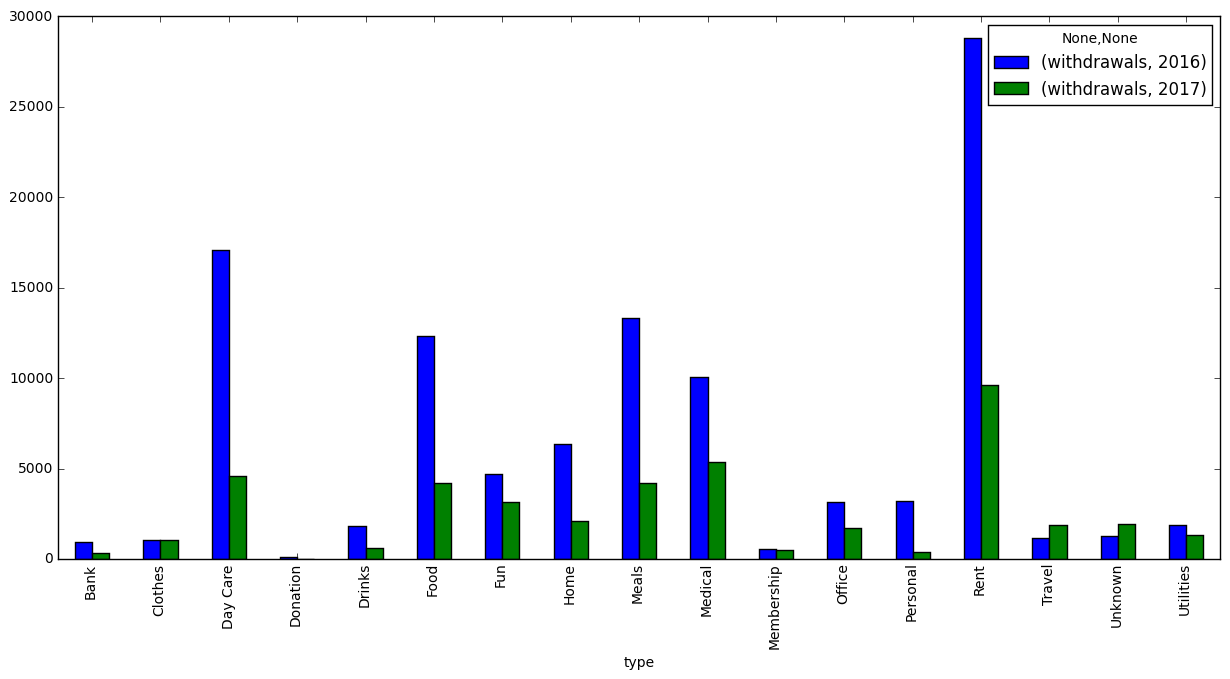

In [136]:
# update
# show the monthly averages (minus current month - since it is not yet complete)
# show total income per month
# show total $ value for each category
# d.groupby((d.type))['withdrawals'].sum()
# bg = d.groupby((d.type)).sum().sort_values(by=['withdrawals'], ascending=False)
# bg.plot(kind='bar', rot=45, legend=False, grid=True)

bg = d.groupby([(d.type), d.index.year]).sum().unstack()
# bg.columns = bg.columns.droplevel()
bg.plot(kind='bar')

In [5]:
d.groupby([(d.index.year),(d.index.month), (d.type)]).sum()

withdrawals
       type                      
2016 1 Bank Charges         83.46
       Coffee                5.78
       Day Care           1700.00
       Drink                60.01
       Drinks               84.29
       Entertainment        94.48
       Food               1167.98
       Home                216.82
       Meal               1398.29
       Medical            1225.32
       Mobile              173.66
       Office               40.97
       Rent               2400.00
       Transfer            144.90
       Travel               57.30
     2 Bank Charges         74.85
       Cash Out             80.00
       Clothing            479.63
       Day Care           1700.00
       Drink                37.52
       Drinks              181.08
       Entertainment       404.89
       Food               1057.11
       Home                297.10
       Meal               1542.08
       Medical             366.19
       Mobile               78.40
       Office               26.23
       Rent               2400.00
       Transfer           1680.00
...                           ...
2017 2 Rent               2400.00
       Travel              291.71
     3 Bank Charges         44.92
       Day Care           1150.00
       Drinks              123.32
       Entertainment       817.92
       Food               1031.70
       Home                 35.91
       Meal                519.15
       Medical             355.00
       Membership          124.95
       Mobile               67.20
       Office              372.15
       Passport             23.75
       Rent               2400.00
       Travel              519.77
     4 Bank Charges        143.00
       Day Care           1150.00
       Drinks               32.70
       Entertainment       188.27
       Food                470.69
       Home                260.39
       Internet            199.09
       Meal                889.18
       Medical             270.00
       Membership          124.95
       Office              631.08
       Rent               2400.00
       Transfer            554.25
       Travel               91.55

[247 rows x 1 columns]